# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


<ol>
    <li> What is the entropy H(Passed)?<br>
        H(Passed) = -(2/6) $\log_2$ (2/6) - (4/6) $log_2$ (4/6) = -0.33 $\log_2$ 0.33 - 0.67 $\log_2$ 0.67 = 0.5278 + 0.387 = 0.9148
    </li>
    <li> What is the entropy H(Passed | GPA)? <br>
        H(Passed | GPA=L) = -(1/2) $\log_2$ (1/2) - (1/2) $\log_2$ (1/2) = 1 <br>
        H(Passed | GPA=M) = -(1/2) $\log_2$ (1/2) - (1/2) $\log_2$ (1/2) = 1 <br>
        H(Passed | GPA=H) = -0 $\log_2$ (0) - 1 $\log_2$ (1) = 0 <br>
        H(Passed | GPA) = (1/3) H(Passed | GPA=L) + (1/3) H(Passed | GPA=M) + (1/3) H(Passed | GPA=H) = 0.67
    </li>
    <li> What is the entropy H(Passed | Studied)? <br>
        H(Passed | Studied=F) = -(2/3) $\log_2$ (2/3) - (1/3) $\log_2$ (1/3) = 0.9148<br>
        H(Passed | Studied=T) = -0 $\log_2$ (0) - 1 $\log_2$ (1) = 0 <br>
        H(Passed | Studied) = 0.4574
    </li>
    <li> Draw the full decision tree that would be learned for this dataset. You do not need to show any calculations. <br>
    </li>
</ol>

!["Decision Tree"](./imgs/q1_decision_tree.png "Decision Tree")

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

<ol>
    <li> Explain Gini impurity and Entropy. <br>
        Gini Impurity is one of the methods used in Decision Trees to decide the optimal splits used to make the decision tree. It tells us the probability of misclassifying an observation. The lower the Gini impurity, the better the split. The formula for Gini impurity is: $1 - \sum_{i=1}^{n}{p_i^2}$. <br>
        Entropy is another method used in Decision Trees to decide the optimal splits used to make the decsion tree. It tells us the "purity" of a split by measuring the amount of information contained in a split. THe formula for Entropy is: $-\sum_{i=1}^{n}{p_i log_2(p_i)}$.
    </li>
    <li> What are the min and max values for both Gini impurity and Entropy. <br>
        Gini impurity: 0 to 0.5. <br>
        Entropy: 0 to 1.
    </li>
</ol>

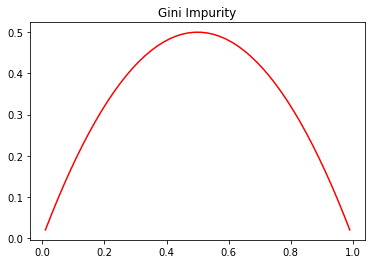

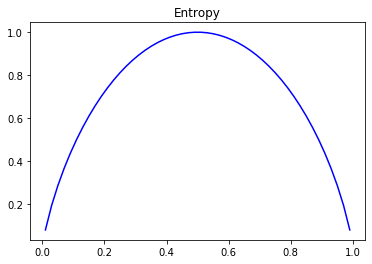

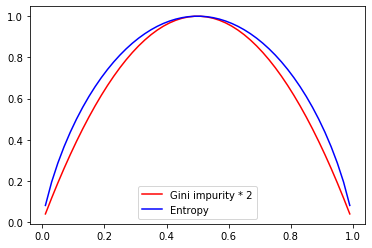

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 3. Plot the Gini impurity and Entropy for 𝑝 ∈ [0,1].
x = np.linspace(0.01, 0.99)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x, y, color = 'r')
plt.title("Gini Impurity")
plt.show()
y = - ((x*np.log2(x)) + (1 - x)*(np.log2(1 - x)))
plt.plot(x, y, color = 'b')
plt.title("Entropy")
plt.show()

# 4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.
y = 1 - (x*x) - (1-x)*(1-x)
y = 2 * y
y_2 = - ((x*np.log2(x)) + (1 - x)*(np.log2(1 - x)))
plt.plot(x, y, color = 'r', label = 'Gini impurity * 2')
plt.plot(x, y_2, color = 'b', label = 'Entropy')
plt.legend()
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [2]:

#######################

import pandas as pd
data = pd.read_csv("spambase.data", sep=",", header=None)
print(data)

#######################


        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [3]:

#######################

normalised_data = data.iloc[:, :-1]
for column in normalised_data.columns:
    # implementing zero mean, unit variance normalisation
    normalised_data[column] = (normalised_data[column] - normalised_data[column].mean()) / normalised_data[column].std()
normalised_data = pd.concat([normalised_data, data.iloc[:, -1]], axis = 1)
print(normalised_data)

#######################


            0         1         2         3         4         5         6   \
0    -0.342396  0.330849  0.712781 -0.046894  0.011563 -0.350228 -0.291762   
1     0.345322  0.051904  0.435082 -0.046894 -0.256089  0.672326  0.244717   
2    -0.145906 -0.165054  0.851631 -0.046894  1.364698  0.343648  0.193623   
3    -0.342396 -0.165054 -0.556700 -0.046894  0.472521 -0.350228  0.500183   
4    -0.342396 -0.165054 -0.556700 -0.046894  0.472521 -0.350228  0.500183   
...        ...       ...       ...       ...       ...       ...       ...   
4596  0.672807 -0.165054  0.673110 -0.046894 -0.464264  0.781886 -0.291762   
4597 -0.342396 -0.165054 -0.556700 -0.046894 -0.464264 -0.350228 -0.291762   
4598  0.640058 -0.165054  0.038369 -0.046894 -0.464264 -0.350228 -0.291762   
4599  2.801459 -0.165054 -0.556700 -0.046894  0.011563 -0.350228 -0.291762   
4600 -0.342396 -0.165054  0.732617 -0.046894 -0.464264 -0.350228 -0.291762   

            7         8         9   ...        48        49    

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [4]:

#######################

import sklearn as sl
from sklearn.model_selection import train_test_split as splitter

X_train, X_test, Y_train, Y_test = splitter(normalised_data.iloc[:, :-1], normalised_data.iloc[:, -1],
                                                                          test_size = 0.2,
                                                                          random_state = 42)
print(X_train.shape)
print(X_test.shape)
Y_test = Y_test.to_numpy()

#######################


(3680, 57)
(921, 57)


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [5]:
# Initialize K and split the data
# Run the K fold Validation and report the scores

#######################


from sklearn.tree import DecisionTreeClassifier as decision_tree
from tabulate import tabulate

def accuracy(y_pred, y_actual):
    total_correct = 0
    for i in range(len(y_actual)):
        if(y_pred[i] == y_actual[i]):
            total_correct += 1
    accuracy = total_correct / len(y_actual)
    return accuracy

training_data = pd.concat((X_train, Y_train), axis = 1)
# performing k fold cross validation on the training data with k = 10
k = 10
# shuffling the training data
training_data = training_data.reindex(np.random.permutation(training_data.index))
training_data = training_data.reset_index(drop=True)
training_data_X = training_data.iloc[:, :-1]
training_data_Y = training_data.iloc[:, -1]
each_fold_size = int(len(training_data_X) / k)
folds_X = []
folds_Y = []
for i in range(k):
    folds_X.append(training_data_X[i * each_fold_size:(i + 1) * each_fold_size])
    folds_Y.append(training_data_Y[i * each_fold_size:(i + 1) * each_fold_size])
training_scores = []
validation_scores = []
testing_scores = []

for i in range(k):
    
    # 1st iteration => keep 1st fold as test set and others as train
    # 2nd iteration => keep 2nd fold as test set and others as train ...
    cur_X_train = None
    cur_X_test = folds_X[i]
    cur_Y_train = None
    cur_Y_test = folds_Y[i]
    for j in range(k):
        if(i != j):
            if(cur_X_train is not None):
                cur_X_train = pd.concat([cur_X_train, folds_X[j]])
                cur_Y_train = pd.concat([cur_Y_train, folds_Y[j]])
            else:
                cur_X_train = folds_X[j]
                cur_Y_train = folds_Y[j]
    dt = decision_tree()
    dt.fit(cur_X_train, cur_Y_train)
    cur_Y_train = cur_Y_train.to_numpy()
    training_scores.append(accuracy(dt.predict(cur_X_train), cur_Y_train))
    cur_Y_test = cur_Y_test.to_numpy()
    validation_scores.append(accuracy(dt.predict(cur_X_test), cur_Y_test))
    testing_scores.append(accuracy(dt.predict(X_test), Y_test))

training_scores = np.array(training_scores)
validation_scores = np.array(validation_scores)
testing_scores = np.array(testing_scores)

print("Average Error : {:f} +- {:f}".format(np.mean(1 - validation_scores), np.std(1 - validation_scores)))

table = []
for i in range(k):
    table.append((i+1, training_scores[i], validation_scores[i], testing_scores[i]))

print(tabulate(table, headers=["Split", "Training Scores", "Validation Scores", "Testing Scores"], tablefmt="fancy_grid"))

#######################

Average Error : 0.088587 +- 0.011018
╒═════════╤═══════════════════╤═════════════════════╤══════════════════╕
│   Split │   Training Scores │   Validation Scores │   Testing Scores │
╞═════════╪═══════════════════╪═════════════════════╪══════════════════╡
│       1 │          0.999396 │            0.934783 │         0.912052 │
├─────────┼───────────────────┼─────────────────────┼──────────────────┤
│       2 │          0.999396 │            0.899457 │         0.89468  │
├─────────┼───────────────────┼─────────────────────┼──────────────────┤
│       3 │          0.999396 │            0.913043 │         0.903366 │
├─────────┼───────────────────┼─────────────────────┼──────────────────┤
│       4 │          0.999396 │            0.913043 │         0.917481 │
├─────────┼───────────────────┼─────────────────────┼──────────────────┤
│       5 │          0.999396 │            0.904891 │         0.900109 │
├─────────┼───────────────────┼─────────────────────┼──────────────────┤
│       6 │   

### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

<ol>
    <li> What is boosting, bagging and  stacking? Which class does random forests belong to and why? <br> <br>
       Boosting involves training classifiers in a sequential manner with the goal of learning from the mistakes made by the prior classifiers. All the data points are first given equal weights. Then we select a subset of data points based on the likelihood that we will select a particular point given its weight. Then, using the subset, we train a classifier. The original dataset is put into the classifier for prediction after training. The weights of the data points are then updated in accordance with the classifier's performance. The weights of incorrectly classified points are increased and the opposite is done to weights of correctly classified points. The procedure of selecting a subset of data points and running a classifier on it is then repeated till we either reach a low error rate or a certain number of classifiers is reached. <br> <br>
       Bagging involves the creation of various subsets of data using replacement random sampling. Then, using each subgroup, we train a classifier. The majority vote of all the classifiers is used to assign the class with the most votes to a new data point. <br> <br>
        Stacking involves two layers of classification. The original dataset is used to train the first layer and the predictions from the first layer are used to train the second layer. For categorisation, the second layer's predictions are used. <br> <br>
        Since random forests are a bagging algorithm, they fall within the bagging class. The reason behind this is that in order to categorise a new data point, it uses the consensus / votes of all decision trees that have been trained on various subsets of data.
</li>
</ol>

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [6]:
from statistics import mode
def random_forest_algorithm(num_trees = 50): # Pass necessary params as per requirements
    #######################
    
    random_forest = []
    for i in range(num_trees):
        # dropping rows randomly
        random_indices = np.random.choice(range(len(training_data)), len(data), replace=True)
        bootstrapped_data = training_data.iloc[random_indices]
        # dropping columns randomly for each tree of random forest
        # i have chosen max_features to be retained as 6 (random
        # number which gives good accuracy) features
        dt = decision_tree(max_features = 6)
        bootstrapped_data_X = bootstrapped_data.iloc[:, :-1]
        bootstrapped_data_Y = bootstrapped_data.iloc[:, -1]
        dt.fit(bootstrapped_data_X, bootstrapped_data_Y)
        random_forest.append(dt)
    votes = []
    for tree in random_forest:
        vote = tree.predict(X_test)
        votes.append(vote)
    votes = np.array(votes)
    pred = []
    for i in range(votes.shape[1]):
        pred.append(mode(votes[:, i]))
    return accuracy(pred, Y_test)

    #######################

print("Test Accuracy:", random_forest_algorithm())

Test Accuracy: 0.9533116178067318


In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, oob_score=True)
clf.fit(X_train, Y_train)
print("Test Accuracy:", clf.score(X_test, Y_test))
print("This was obtained using sklearn RandomForestClassifier (to verify my results)")

Test Accuracy: 0.9511400651465798
This was obtained using sklearn RandomForestClassifier (to verify my results)
